<a href="https://colab.research.google.com/github/dolongbien/ML2018/blob/master/PCA_LDA_DimensionalReduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Saving dataset.csv to dataset (8).csv
   V1        V2  label
0   1  0.747659      1
1   2  0.486315      1
2   3  2.950838      1
3   4  3.059579      1
4   5  4.602935      1


/usr/local/lib/python3.6/dist-packages/matplotlib/figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "



W vector of LDA: [[-0.71381103]
 [ 0.70033836]]


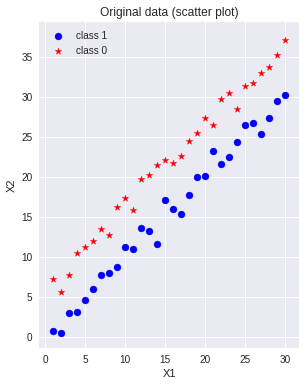

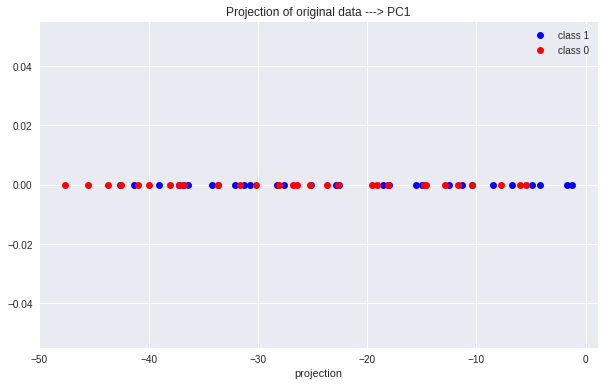

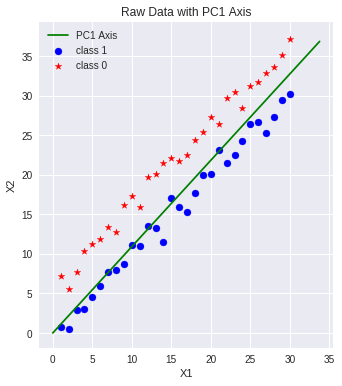

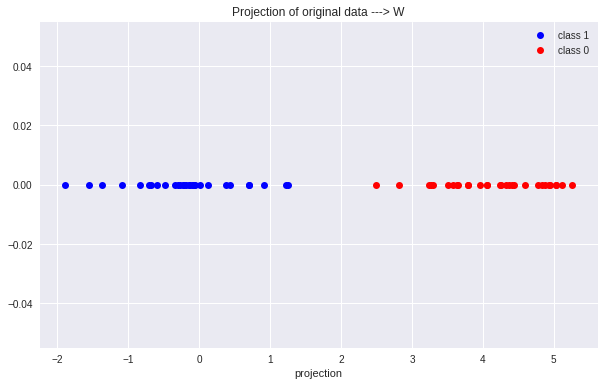

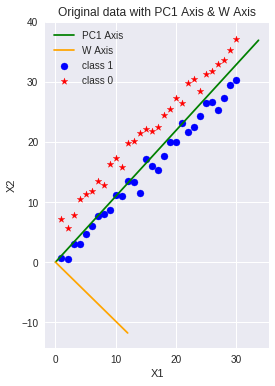

In [0]:


def plot_original_data(X, y):
    V1_ = np.where(y==1)[0]
    V2_ = np.where(y==0)[0]
    
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    ax.set_title('Original data (scatter plot)')
    ax.scatter(X[V1_][:,0], X[V1_][:,1], color='blue', label='class 1', marker='o')
    ax.scatter(X[V2_][:,0], X[V2_][:,1], color='red', label='class 0', marker='*')
    ax.set_aspect('equal', 'box')
    ax.set_xlabel('X1')
    ax.set_ylabel('X2')
    ax.legend()
    fig.set_size_inches(10, 6)
    plt.savefig('Original data (scatter plot)')
    fig.show()
   
# plot original data + PC1 axis
def plot_PC1_axis(X, y, pca_results):
    V1_ = np.where(y==1)[0]
    V2_ = np.where(y==0)[0]
    
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    ax.set_title('Original data & PC1 Axis')
    ax.scatter(X[V1_][:,0], X[V1_][:,1], color='blue', label='class 1', marker='o')
    ax.scatter(X[V2_][:,0], X[V2_][:,1], color='red', label='class 0', marker='*')
    plt.plot([0, -50*pca_results['eig_pairs'][0][1][0]],
             [0, -50*pca_results['eig_pairs'][0][1][1]], 'g-', label = 'PC1 Axis')
    ax.set_aspect('equal', 'box')
    ax.set_xlabel('X1')
    ax.set_ylabel('X2')
    ax.legend()
    fig.set_size_inches(10, 6)
    plt.savefig('Original data & PC1 Axis')
    fig.show()

# plot projection after LDA
def plotLDAProjection(projection):
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    ax.set_title('Projection of original data ---> W')
    ax.set_xlabel('projection')
    ax.set_ylabel('')
    ax.plot(projection[:30], np.zeros(30), linestyle='None', marker='o', markersize=7, color='blue', label='class 1')
    ax.plot(projection[30:], np.zeros(30), linestyle='None', marker='o', markersize=7, color='red', label='class 0')
    ax.legend()
    fig.set_size_inches(10, 6)
    plt.savefig('Projection of original data ---> W')
    fig.show()

# plot W axis with original data & PC1 axis
def plotWAxis(X, y, W, pca_results):
    V1_ = np.where(y==1)[0]
    V2_ = np.where(y==0)[0]
    
    W_scaled = W * 12.0 / W[0]
    
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    ax.set_title('Original data with PC1 Axis & W Axis')
    ax.scatter(X[V1_][:,0], X[V1_][:,1], color='blue', label='class 1', marker='o')
    ax.scatter(X[V2_][:,0], X[V2_][:,1], color='red', label='class 0', marker='*')
    plt.plot([0, -50*pca_results['eig_pairs'][0][1][0]],
             [0, -50*pca_results['eig_pairs'][0][1][1]], 'g-', label = 'PC1 Axis')
    ax.plot([0, W_scaled[0]], [0, W_scaled[1]], color='orange', label = 'W Axis')
    ax.set_aspect('equal', 'box')
    ax.set_xlabel('X1')
    ax.set_ylabel('X2')
    ax.legend()
    fig.set_size_inches(10, 6)
    plt.savefig('Original data with PC1 Axis & W Axis')
    fig.show()
    
# plot projection after PCA
def plotPC1Projection(projection):
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    ax.set_title('Projection of original data ---> PC1')
    ax.set_xlabel('projection')
    ax.set_ylabel('')
    ax.plot(projection[:30], np.zeros(30), linestyle='None', marker='o', markersize=7, color='blue', label='class 1')
    ax.plot(projection[30:], np.zeros(30), linestyle='None', marker='o', markersize=7, color='red', label='class 0')
    ax.legend()
    fig.set_size_inches(10, 6)
    plt.savefig('Projection of original data ---> PC1')
    fig.show()
    
# compute mean
def computeMean(x):
    return np.mean(x, axis = 0)

# mean for each class
def computeMeanVectors(X,y):
    mean_vectors = []
    for class_label in np.unique(y):
        mean_vectors.append(computeMean(X[y == class_label]))
    
    return mean_vectors
    
#  Scatter-Within SW
def calculateSWithin(X, y):
    n_dim = X.shape[1]
    S_Within = np.zeros([n_dim, n_dim])
    mean_vectors = computeMeanVectors(X, y)
    
    for class_label in np.unique(y):
        within_scatter = np.zeros([n_dim, n_dim])
        
        for sample in X[y == class_label]:
            sample, vec = sample.reshape(n_dim, 1), mean_vectors[int(class_label)].reshape(n_dim, 1)
            within_scatter += np.dot(sample - vec, (sample - vec).T)
        S_Within += within_scatter
    
    return S_Within

# Scatter-Between SB
def calculateSBetween(X, y):
    n_dim = X.shape[1]
    S_Between = np.zeros([n_dim, n_dim])
    mean_global = computeMean(X)
    mean_vectors = computeMeanVectors(X, y)
    
    for class_label in np.unique(y):
        N = X[y == class_label].shape[0]
        mean_global, vec = mean_global.reshape(n_dim, 1), mean_vectors[int(class_label)].reshape(n_dim, 1)
        S_Between += N * np.dot(vec - mean_global, (vec - mean_global).T)
    
    return S_Between
    

def do_LDA(X, y):
    m, n = X.shape
    
    # calculate SB and SW matrix
    S_Between = calculateSBetween(X, y)
    S_Within = calculateSWithin(X, y)
    
    # calculate eigenvalues and eigenvectors
    eig_vals, eig_vecs = np.linalg.eig(np.dot(np.linalg.inv(S_Within), S_Between))
    
    # eigenvalue-eigenvector pair
    eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

    # sort eigenvalue-eigenvector pair
    eig_pairs.sort(reverse=True, key=(lambda x: x[0]))
    
    # get largest eigenvalue
    W = eig_pairs[0][1].reshape(n,1)
    
    # linear transformation ---> new space
    projection = np.matmul(X, W)
    
    
    projection = projection.tolist()
    
    return W, projection


def PCA(X):
    m, n = X.shape
    
    pca_data = X
            
    # 1. co-variance matrix
    cov_mat = np.cov(pca_data.T)
            
    # 2. eigenvalues and eigenvectors for the cov matrix
    eig_vals, eig_vecs = np.linalg.eig(cov_mat)
    
    eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]
    
    # 3. sorting eigen value
    eig_pairs.sort(reverse=True, key=(lambda x: x[0]))
    
    pcaScores = np.matmul(pca_data, eig_vecs)
    
    matrix_w = np.hstack((eig_pairs[0][1].reshape(n,1)))
    
    percentVarianceExplained = 100 * eig_pairs[0][0] / sum(eig_vals)

    
    percentVarianceExplained = 100 * eig_pairs[1][0] / sum(eig_vals)
    
    projection1 = pca_data.dot(matrix_w)
    
    projection2 = pca_data.dot(np.hstack((eig_pairs[1][1].reshape(n,1))))
    
    
    # projection
    Y = projection1
    
    pca_results = {'data': X,
                   'eig_pairs': eig_pairs,
                   'scores': pcaScores,
                   'results': Y}
    
    return pca_results

def main():
    uploaded = files.upload()
    df = pd.read_csv(filepath_or_buffer='dataset.csv', header=0, sep=',')
    
    # remove null
    df.dropna(how="all", inplace=True)
    print(df.head())
    
    # df to numpy
    data_in = df.values
        
    # input data, X=(x1,x2)
    X = data_in[:, [0, 1]]
    
    # class labels
    y = df.values[:, 2]
    
    # plot ogirinal data
    plot_original_data(np.array(X), np.array(y).reshape(len(X), 1))
    
    pca_results = PCA(np.array(X))
    
    # plot projected dataset PCA
    plotPC1Projection(pca_results['results'])
    
    # plot PC1 axis
    plotPC1Axis(np.array(X), np.array(y).reshape(len(X), 1), pca_results)
            
    W, projection = do_LDA(np.matrix(X), np.array(y))
    
    print('\nW vector of LDA:', W)
    
    # plot projected after LDA
    plotLDAProjection(projection)
    
    # plotting W axis
    plotWAxis(np.array(X), np.array(y).reshape(len(X), 1), W, pca_results)
    


if __name__ == '__main__':
    main()
